In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('loan2023.csv')

In [4]:
print(df.head(10))

   amount  interest grade  years ownership    income  age
0    5000     10.65     B     10      RENT   24000.0   33
1    2400     10.99     C     25      RENT   12252.0   31
2   10000     13.49     C     13      RENT   49200.0   24
3    5000     10.99     A      3      RENT   36000.0   39
4    3000     10.99     E      9      RENT   48000.0   24
5   12000     12.69     B     11       OWN   75000.0   28
6    9000     13.49     C      0      RENT   30000.0   22
7    3000      9.91     B      3      RENT   15000.0   22
8   10000     10.65     B      3      RENT  100000.0   28
9    1000     16.29     D      0      RENT   28000.0   22


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Assuming your data is stored in a DataFrame called 'df'
# If not, you can create one using pd.DataFrame(your_data)

# Encode categorical variable 'grade'
label_encoder = LabelEncoder()
df['grade'] = label_encoder.fit_transform(df['grade'])

# Define features and target variable
X = df[['interest', 'grade', 'years', 'ownership', 'income', 'age']]
y = df['amount']

# Convert categorical variable 'ownership' to dummy variables
X = pd.get_dummies(X, columns=['ownership'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 34351059.09825167
R-squared: 0.14057559729366564


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
# ...

# Encode categorical variable 'grade'
label_encoder = LabelEncoder()
df['grade'] = label_encoder.fit_transform(df['grade'])

# Define features and target variable
X = df[['interest', 'grade', 'years', 'ownership', 'income', 'age']]
y = df['amount']

# Convert categorical variable 'ownership' to dummy variables
X = pd.get_dummies(X, columns=['ownership'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train[['interest', 'years', 'income', 'age']] = scaler.fit_transform(X_train[['interest', 'years', 'income', 'age']])
X_test[['interest', 'years', 'income', 'age']] = scaler.transform(X_test[['interest', 'years', 'income', 'age']])

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 34351059.09825039
R-squared: 0.14057559729369773


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
# ...

# Encode categorical variable 'grade'
label_encoder = LabelEncoder()
df['grade'] = label_encoder.fit_transform(df['grade'])

# Define features and target variable
X = df[['interest', 'grade', 'years', 'ownership', 'income', 'age']]
y = df['amount']

# Apply one-hot encoding to the 'ownership' column
X = pd.get_dummies(X, columns=['ownership'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train[['interest', 'years', 'income', 'age']] = scaler.fit_transform(X_train[['interest', 'years', 'income', 'age']])
X_test[['interest', 'years', 'income', 'age']] = scaler.transform(X_test[['interest', 'years', 'income', 'age']])

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 34351059.09825039
R-squared: 0.14057559729369773


In [10]:
import pandas as pd

# Assuming your data is stored in a DataFrame called 'df'
# If not, you can create one using pd.DataFrame(your_data)

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numeric columns
correlation_matrix = df[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix)


            amount  interest     grade     years    income       age
amount    1.000000  0.137728  0.143672  0.091639  0.322874  0.049983
interest  0.137728  1.000000  0.889343 -0.054653  0.020847  0.010089
grade     0.143672  0.889343  1.000000 -0.048707  0.022555  0.012504
years     0.091639 -0.054653 -0.048707  1.000000  0.121390  0.015617
income    0.322874  0.020847  0.022555  0.121390  1.000000  0.140343
age       0.049983  0.010089  0.012504  0.015617  0.140343  1.000000


<Axes: >

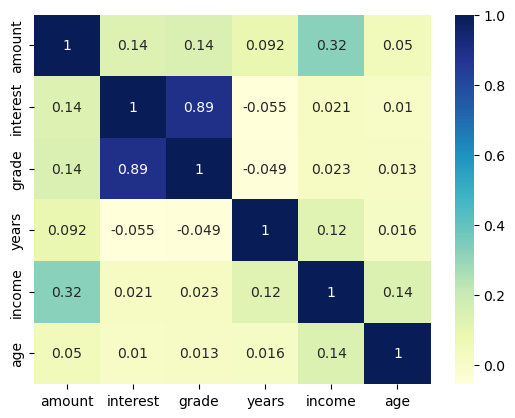

In [11]:
sns.heatmap(correlation_matrix, annot = True, cmap = 'YlGnBu')

array([[<Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'interest'}>],
       [<Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'years'}>],
       [<Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

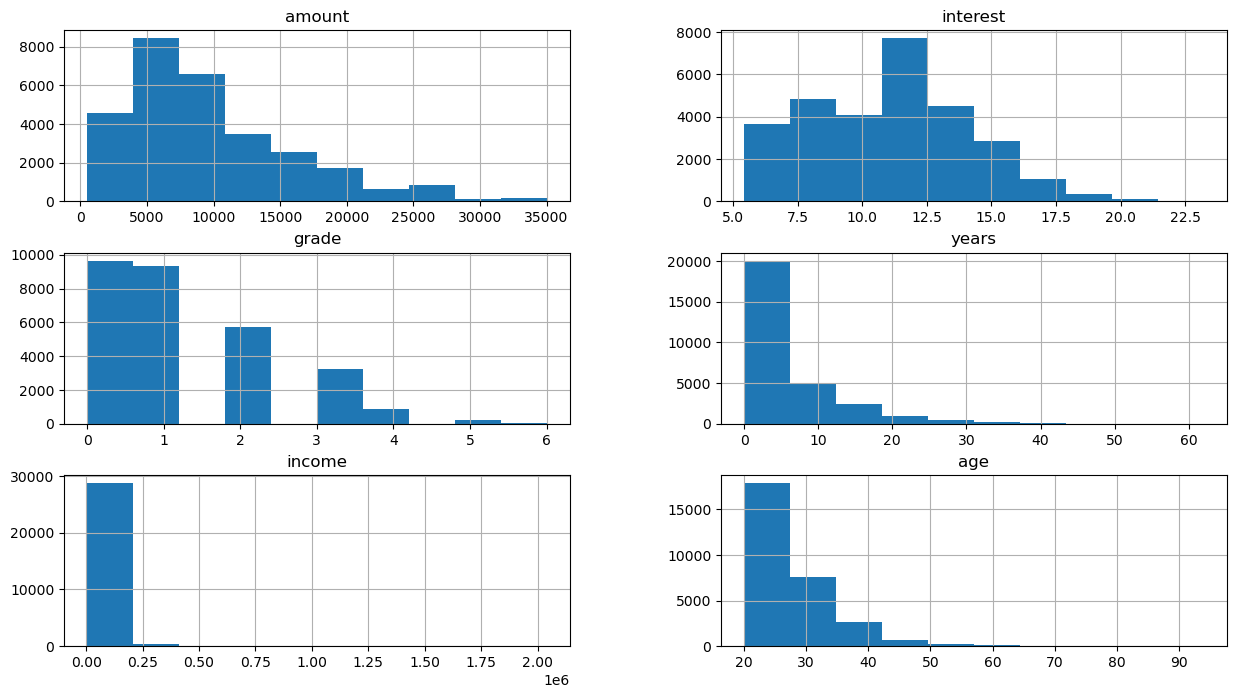

In [12]:
df.hist(figsize = (15,8))

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming your data is stored in a DataFrame called 'df'
# If not, you can create one using pd.DataFrame(your_data)

# Select numeric features
numeric_features = ['amount','interest', 'years', 'income', 'age']

# Create a StandardScaler
scaler = StandardScaler()

# Standardize the numeric features
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Display the standardized DataFrame
print(df)


         amount  interest     years    income       age  grade_0  grade_1  \
0     -0.726459 -0.114627  0.593705 -0.806818  0.855900      0.0      1.0   
1     -1.137633 -0.004258  2.868680 -1.027429  0.533033      0.0      0.0   
2      0.064260  0.807277  1.048700 -0.333599 -0.596999      0.0      0.0   
3     -0.726459 -0.004258 -0.467951 -0.581476  1.824499      1.0      0.0   
4     -1.042747 -0.004258  0.442040 -0.356133 -0.596999      0.0      0.0   
...         ...       ...       ...       ...       ...      ...      ...   
29086 -1.121819 -0.952131 -0.316286  0.808137 -0.112700      1.0      0.0   
29087 -0.172956 -0.234734 -0.467951 -0.919489 -0.435566      0.0      0.0   
29088 -0.726459 -0.952131 -0.922946  0.620351 -0.112700      1.0      0.0   
29089 -0.726459 -1.159883 -0.922946  2.498206 -0.758433      1.0      0.0   
29090 -0.331100 -0.004258 -0.922946 -0.844375 -0.435566      0.0      0.0   

       grade_2  grade_3  grade_4  grade_5  grade_6  ownership_MORTGAGE  \
0

In [28]:
df.head(10)

,amount,interest,years,income,age,grade_0,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,-0.726459,-0.114627,0.593705,-0.806818,0.855900,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.137633,-0.004258,2.868680,-1.027429,0.533033,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.064260,0.807277,1.048700,-0.333599,-0.596999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.726459,-0.004258,-0.467951,-0.581476,1.824499,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.042747,-0.004258,0.442040,-0.356133,-0.596999,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.380547,0.547585,0.745370,0.150888,0.048734,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,-0.093884,0.807277,-0.922946,-0.694147,-0.919866,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,-1.042747,-0.354841,-0.467951,-0.975825,-0.919866,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.064260,-0.114627,-0.467951,0.620351,0.048734,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,-1.359035,1.716195,-0.922946,-0.731704,-0.919866,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Defining the features and target variable
X = df.drop(['amount'], axis=1)
y = df['amount']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting the loan amounts for the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ",mse)
print("R^2: ", r2)

MSE:  0.8495497771082198
R^2:  0.15013091699923098
